In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score as sil

In [3]:
df=pd.read_csv('EastWestAirlines.csv')

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Data Understanding

In [5]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.shape

(3999, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [9]:
#Normalizing dataframe 
df_norm=norm_func(df.iloc[:,:])

In [10]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Create Dendogram

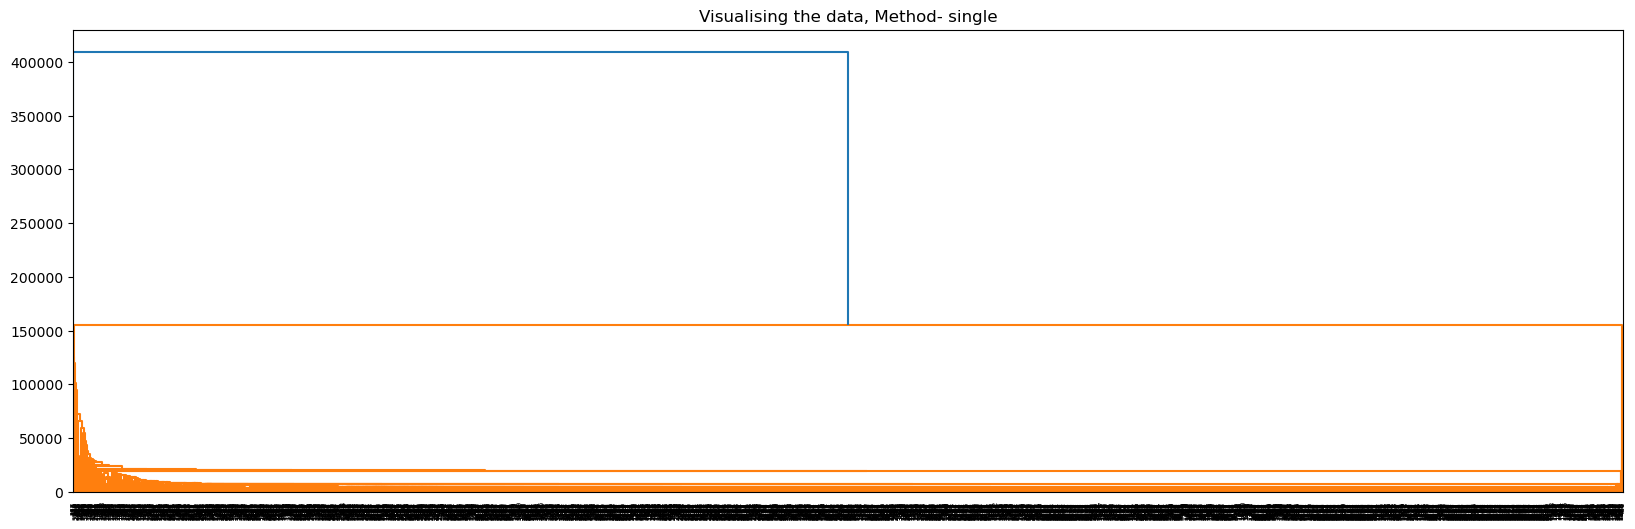

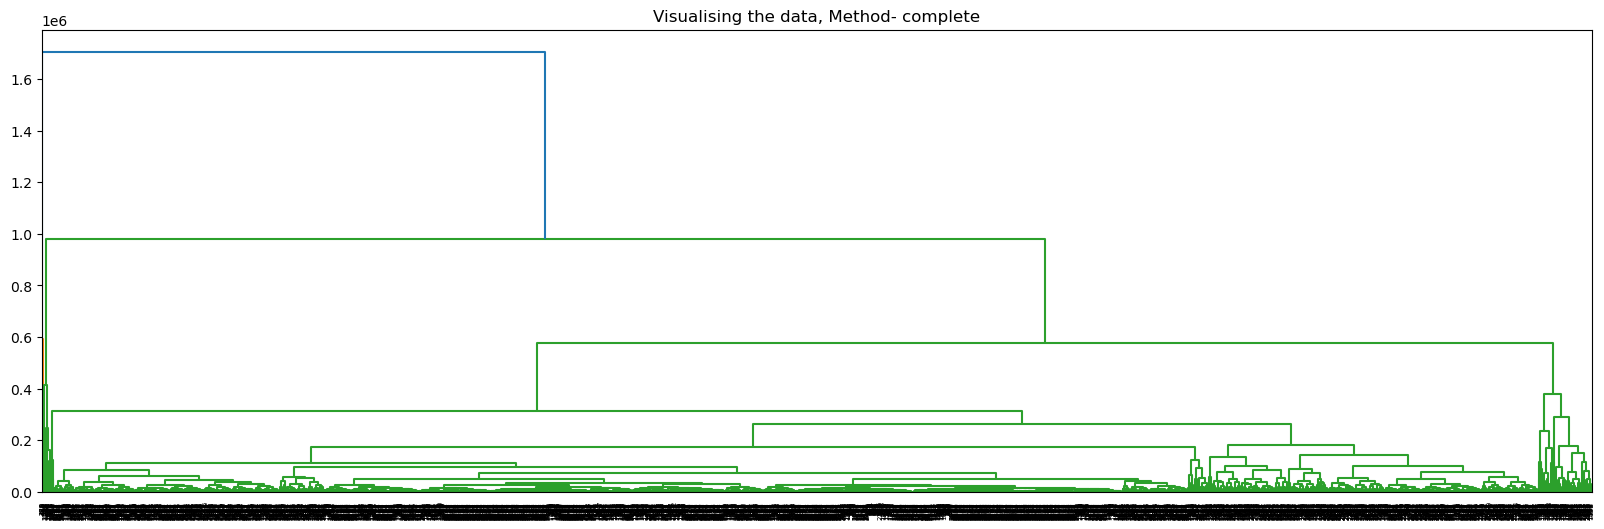

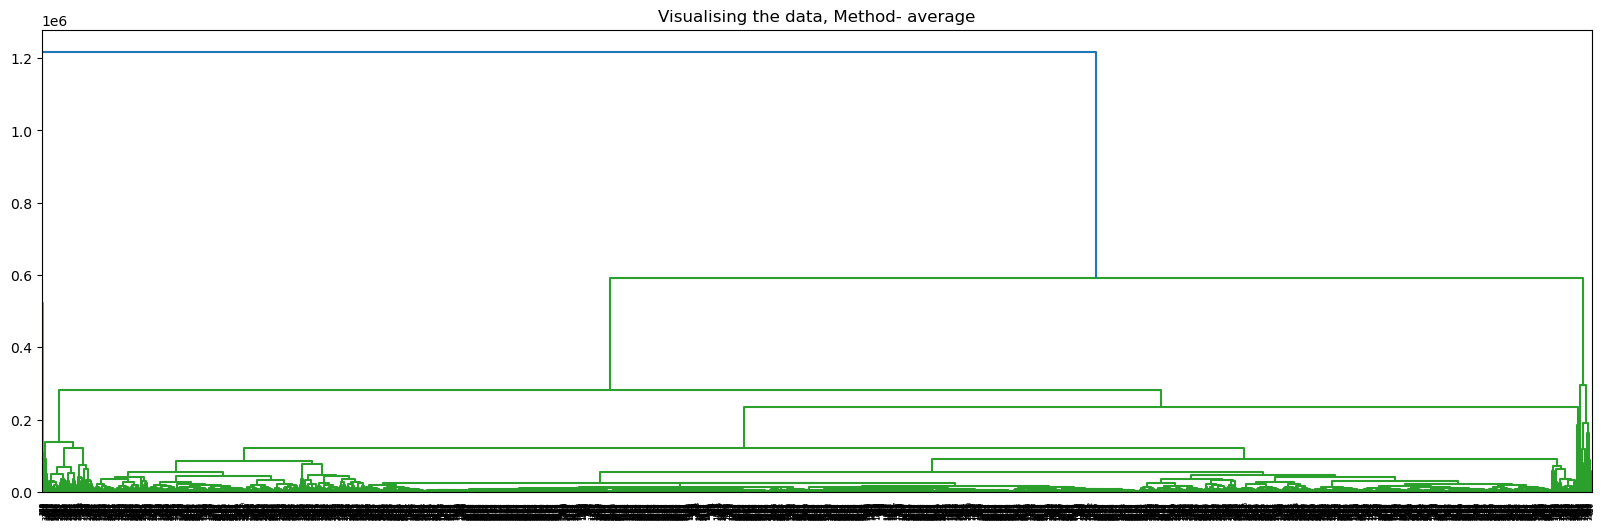

In [11]:
for methods in ['single','complete','average']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(df, method = methods,optimal_ordering=False))


In [12]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(df)
        sc=sil(df,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = single, Sc score = 0.9417235740964994
Clusters = 2, linkage = average, Sc score = 0.922818352398735
Clusters = 2, linkage = complete, Sc score = 0.922818352398735

Clusters = 3, linkage = single, Sc score = 0.9147623607047473
Clusters = 3, linkage = average, Sc score = 0.8501753809792686
Clusters = 3, linkage = complete, Sc score = 0.865400977752386

Clusters = 4, linkage = single, Sc score = 0.9110466884402821
Clusters = 4, linkage = average, Sc score = 0.8497810564682907
Clusters = 4, linkage = complete, Sc score = 0.8651446675704992

Clusters = 5, linkage = single, Sc score = 0.8927034119906091
Clusters = 5, linkage = average, Sc score = 0.8359671672245398
Clusters = 5, linkage = complete, Sc score = 0.7471643765929803

Clusters = 6, linkage = single, Sc score = 0.8907807128820265
Clusters = 6, linkage = average, Sc score = 0.7273142294286759
Clusters = 6, linkage = complete, Sc score = 0.7458087430158579

Clusters = 7, linkage = single, Sc score = 0.71772409

In [16]:
#create clusters
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
hc

AgglomerativeClustering(linkage='single')

In [17]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [31]:
#save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [19]:
new_df=df.copy()
new_df['clusters'] = Clusters

In [20]:
new_df["clusters"].value_counts()

1    2518
0    1481
Name: clusters, dtype: int64

In [21]:
new_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [22]:
new_df[new_df['clusters'] == 0].count()

ID#                  1481
Balance              1481
Qual_miles           1481
cc1_miles            1481
cc2_miles            1481
cc3_miles            1481
Bonus_miles          1481
Bonus_trans          1481
Flight_miles_12mo    1481
Flight_trans_12      1481
Days_since_enroll    1481
Award?               1481
clusters             1481
dtype: int64

In [23]:
new_df[new_df['clusters'] == 1].count()

ID#                  2518
Balance              2518
Qual_miles           2518
cc1_miles            2518
cc2_miles            2518
cc3_miles            2518
Bonus_miles          2518
Bonus_trans          2518
Flight_miles_12mo    2518
Flight_trans_12      2518
Days_since_enroll    2518
Award?               2518
clusters             2518
dtype: int64

In [26]:
df.groupby('ID#').agg(['count']).reset_index()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,count,count,count,count,count,count,count,count,count,count,count
0,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,1,1,1,1,1
2,3,1,1,1,1,1,1,1,1,1,1,1
3,4,1,1,1,1,1,1,1,1,1,1,1
4,5,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,1,1,1,1,1,1,1,1,1,1,1
3995,4018,1,1,1,1,1,1,1,1,1,1,1
3996,4019,1,1,1,1,1,1,1,1,1,1,1


In [27]:
df.groupby('ID#').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
4018,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
4019,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0


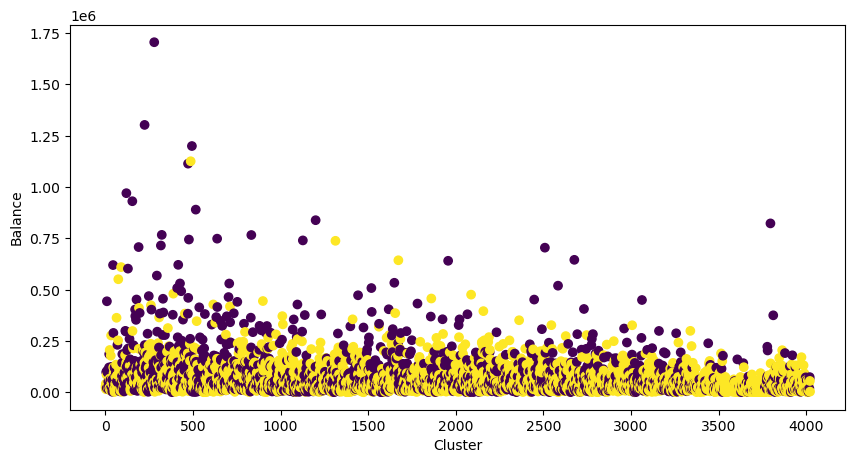

In [28]:
#plt Cluster
plt.figure(figsize=(10,5))
plt.scatter(df['ID#'],df['Balance'],c=hc.labels_)
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

1 [2164.1265977774983]
2 [2164.1265977774983, 1146.459517093534]
3 [2164.1265977774983, 1146.459517093534, 865.2628279924612]
4 [2164.1265977774983, 1146.459517093534, 865.2628279924612, 673.4712187348882]
5 [2164.1265977774983, 1146.459517093534, 865.2628279924612, 673.4712187348882, 536.203479043267]
6 [2164.1265977774983, 1146.459517093534, 865.2628279924612, 673.4712187348882, 536.203479043267, 452.22843050741204]
7 [2164.1265977774983, 1146.459517093534, 865.2628279924612, 673.4712187348882, 536.203479043267, 452.22843050741204, 397.9445893438376]
8 [2164.1265977774983, 1146.459517093534, 865.2628279924612, 673.4712187348882, 536.203479043267, 452.22843050741204, 397.9445893438376, 346.2280906369084]
9 [2164.1265977774983, 1146.459517093534, 865.2628279924612, 673.4712187348882, 536.203479043267, 452.22843050741204, 397.9445893438376, 346.2280906369084, 308.5169582079873]
10 [2164.1265977774983, 1146.459517093534, 865.2628279924612, 673.4712187348882, 536.203479043267, 452.2284305

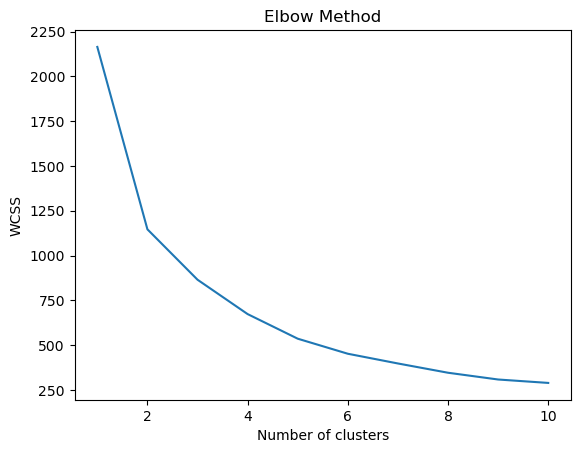

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_) 
    print(i,wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K Means Clustering

In [32]:
df=pd.read_csv('EastWestAirlines.csv')

In [33]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [34]:
#Normalizing dataframe 
df_norm=norm_func(df.iloc[:,:])

In [35]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [36]:
from sklearn.cluster import KMeans

In [51]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(df_norm)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(df_norm)
    silscore.append(sil(df_norm,y))

Text(0.5, 1.0, 'Silhoutte Score')

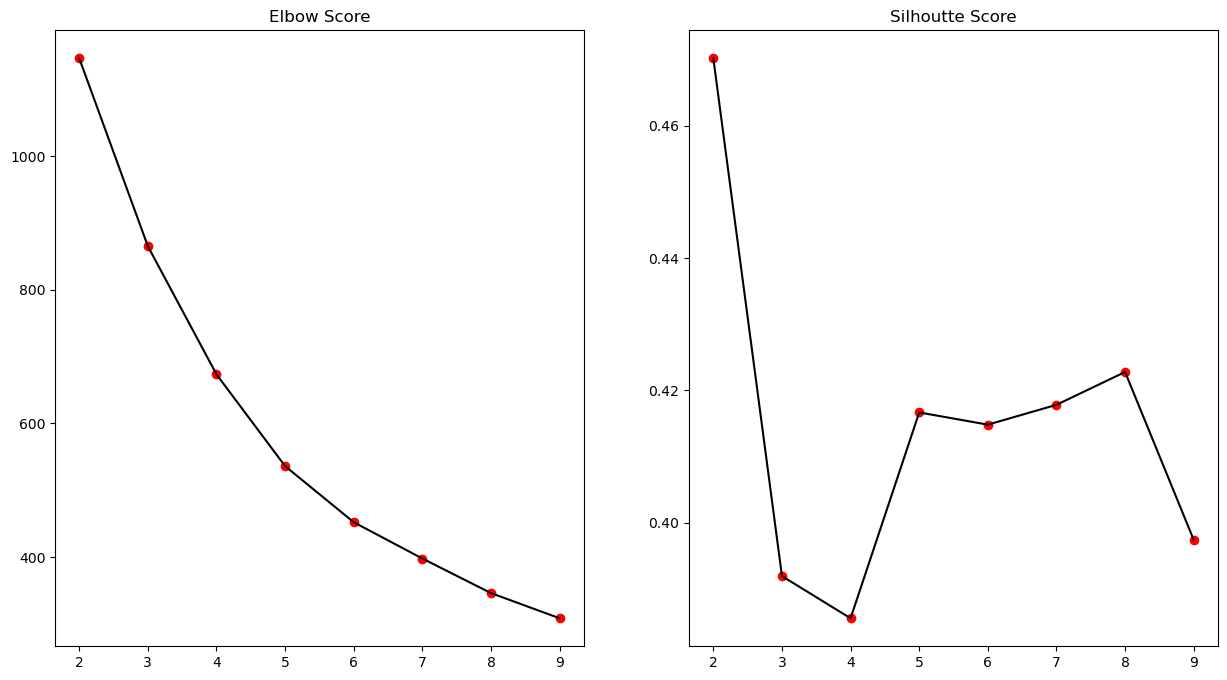

In [52]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

In [54]:
model_kmeans = KMeans(n_clusters=2) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=2)

In [55]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [56]:
md=pd.Series(model_kmeans.labels_)

In [57]:
#Complete-linkage clustering - Wikipedia
df["labels"]=pd.Series(model_kmeans.labels_)

In [58]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [59]:
clusters_kmeans=pd.DataFrame(model_kmeans.labels_,columns=['Clusters'])
clusters_kmeans

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [60]:
df.groupby(['labels'])["ID#"].apply(lambda x:tuple(x))

labels
0    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
1    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
Name: ID#, dtype: object

In [61]:
new_df= df.copy()
new_df['clusters'] = clusters_kmeans

In [62]:
new_df["clusters"].value_counts()

1    2518
0    1481
Name: clusters, dtype: int64

In [63]:
new_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [64]:
new_df[new_df['clusters'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0


In [65]:
new_df[new_df['clusters'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1


# DB SCAN

In [45]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler=MinMaxScaler()
data=scaler.fit_transform(df)
data

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 2.50000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 2.50000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 2.50000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 5.00000000e-01],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 7.50000000e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 7.50000000e-01]])

In [47]:
dbs=DBSCAN(min_samples=5,eps=0.2)
claas_pr=dbs.fit_predict(data)
claas_pr

array([ 0,  0,  0, ..., 12, 11, 11], dtype=int64)

In [48]:
dbs_df=df.copy()
dbs_df['clusters']=claas_pr
dbs_df['clusters'].value_counts() 

 11    934
 0     737
 3     497
 1     283
 2     246
-1     238
 7     206
 6     170
 4     154
 12    114
 5      98
 8      95
 13     75
 15     73
 9      65
 14      8
 10      6
Name: clusters, dtype: int64

In [49]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
clusters,,,,,,,,,,,,,
-1,1787.197479,206111.247899,1540.096639,2.630252,1.184874,1.205882,45591.424370,25.592437,2981.844538,8.789916,4606.575630,0.705882,1.521008
0,1164.215739,45641.617368,28.618725,1.000000,1.000000,1.000000,2357.453189,5.645862,205.160109,0.622795,5579.344640,0.000000,1.000000
1,1658.307420,83270.123675,81.169611,4.000000,1.000000,1.000000,40480.660777,19.406360,441.858657,1.434629,4749.183746,1.000000,0.000000
2,1538.386179,95855.532520,11.654472,3.000000,1.000000,1.000000,18662.829268,15.544715,111.597561,0.390244,4910.939024,0.000000,4.000000
3,1913.331992,68101.802817,133.350101,1.000000,1.000000,1.000000,6240.569416,7.402414,699.334004,2.169014,4306.959759,1.000000,2.000000
4,1007.019481,83060.681818,34.402597,3.000000,1.000000,1.000000,20115.655844,16.954545,383.006494,1.071429,5896.331169,1.000000,0.000000
5,1147.479592,74227.520408,29.540816,2.000000,1.000000,1.000000,9291.071429,13.693878,123.122449,0.336735,5649.438776,0.000000,1.000000
6,1242.464706,134035.911765,65.229412,5.000000,1.000000,1.000000,74381.270588,20.935294,413.764706,1.352941,5497.217647,1.000000,0.000000
7,1695.213592,132409.674757,14.577670,4.000000,1.000000,1.000000,37877.524272,17.708738,245.247573,0.660194,4730.936893,0.000000,4.000000
